[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sadik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sadik\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


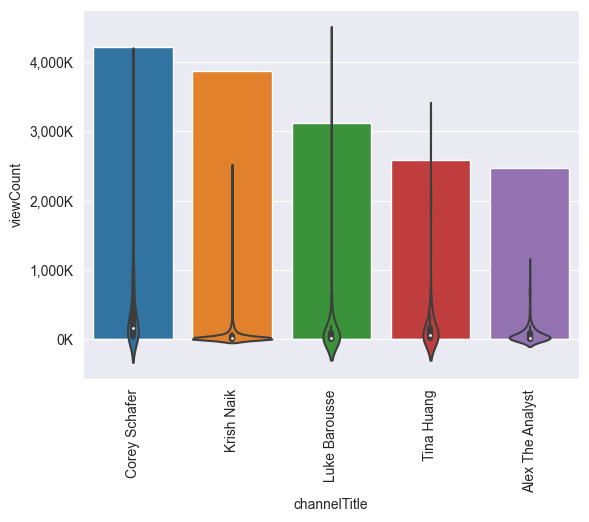

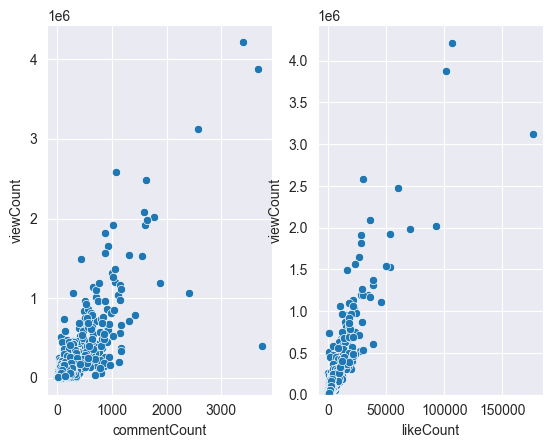

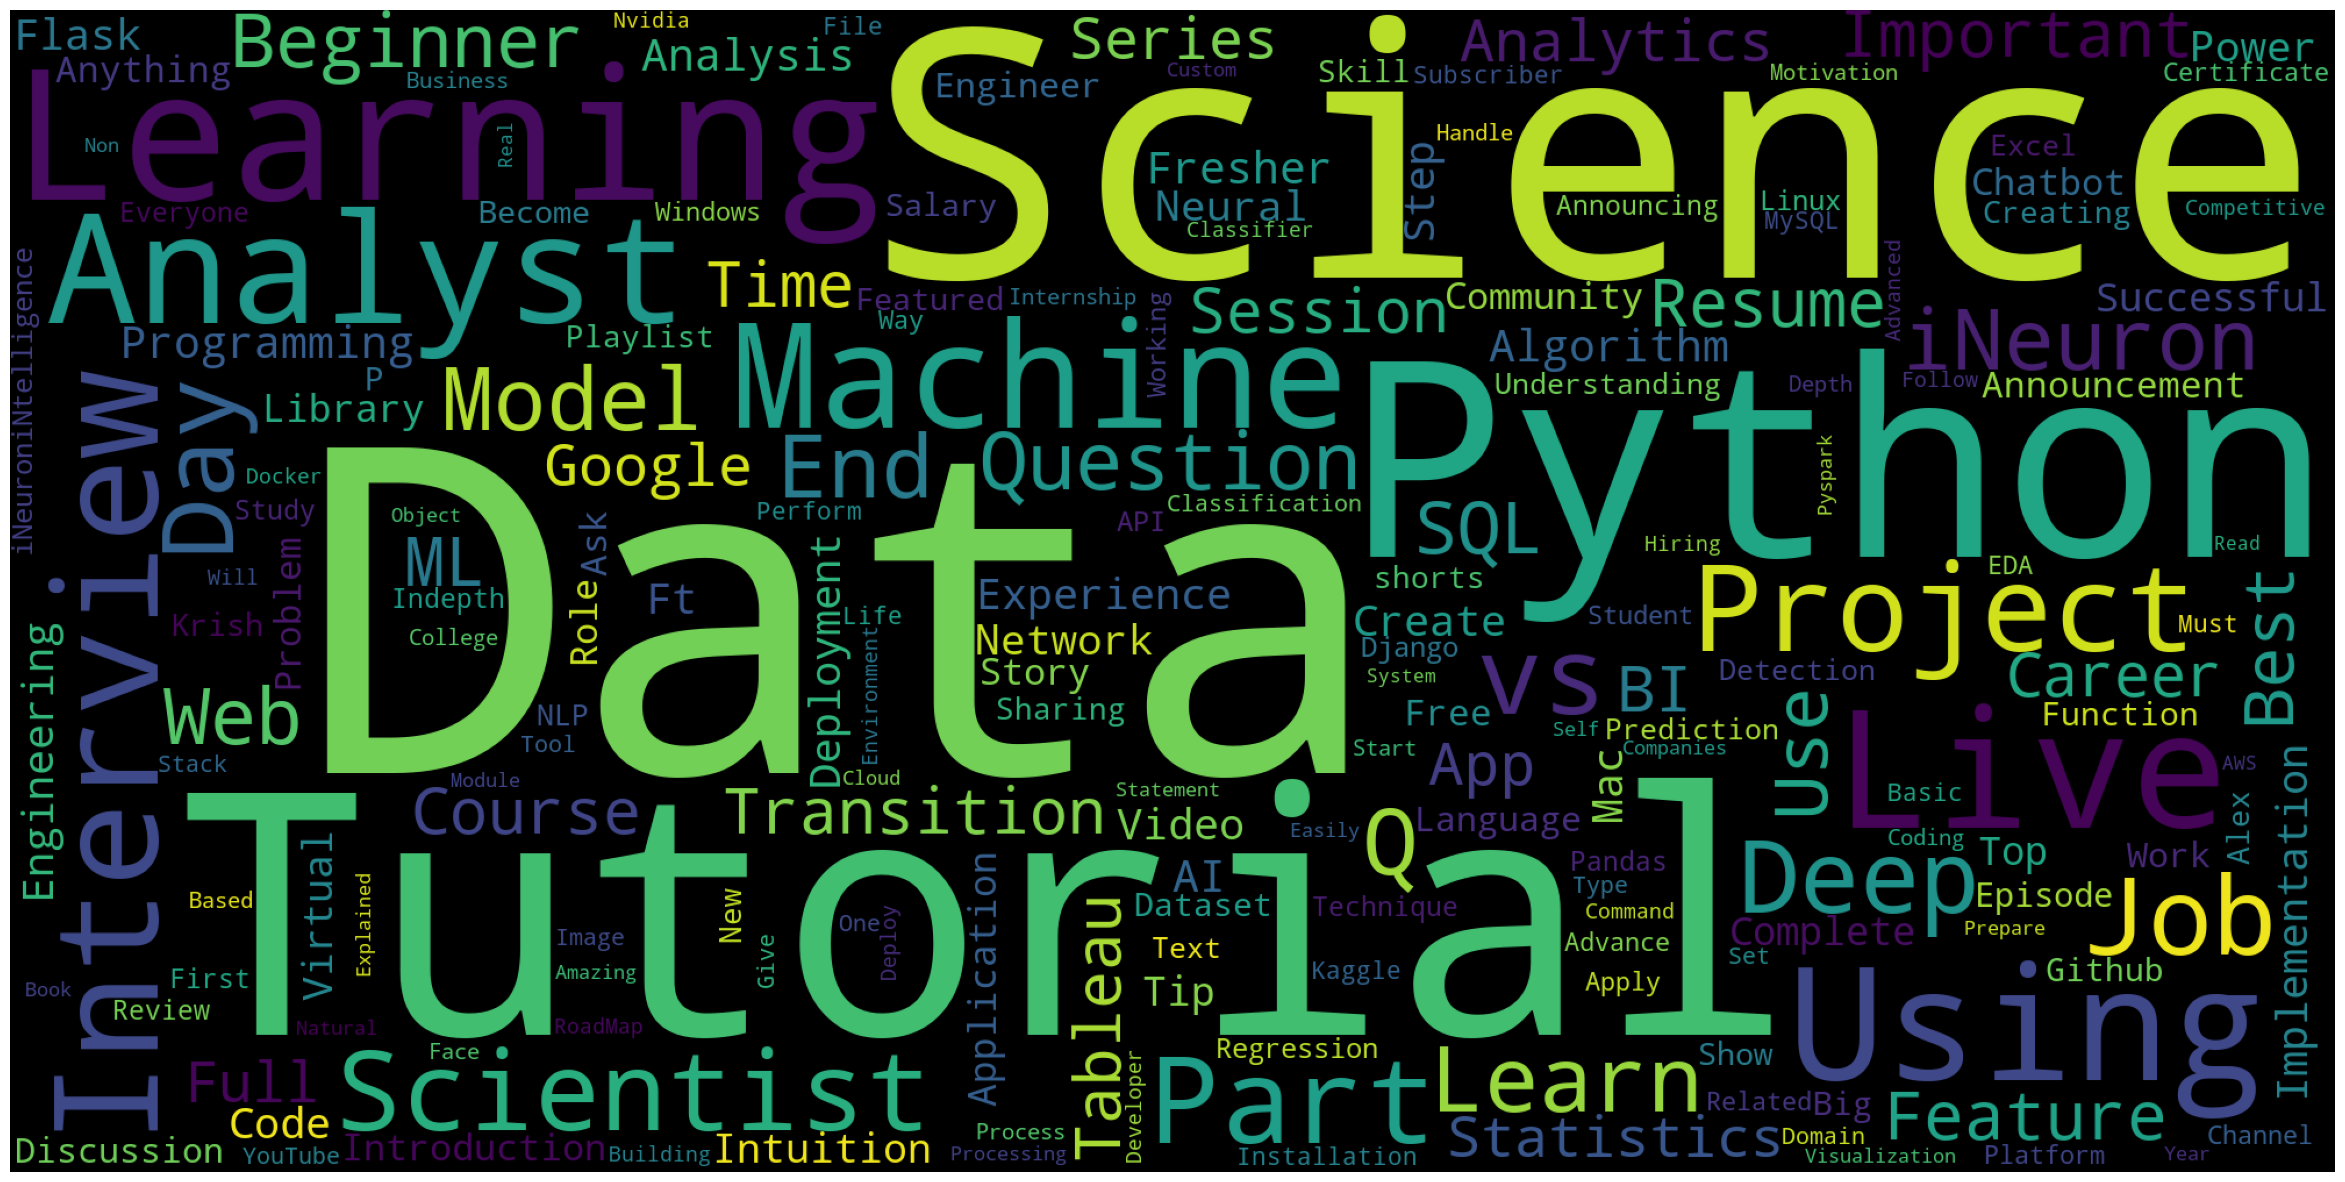

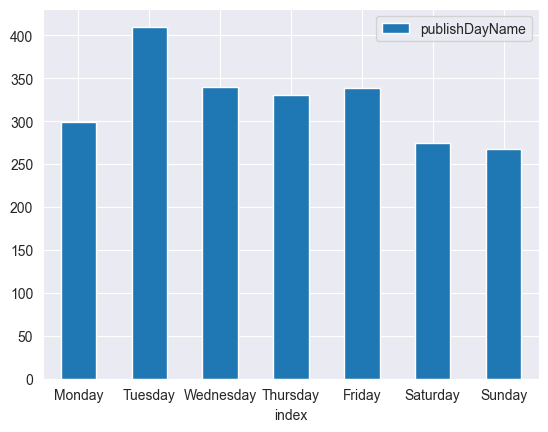

In [17]:
import ipynb
from ipynb.fs.full.Statistical_Analysis import *
from ipynb.fs.full.EDA_Single_Channel import *
from ipynb.fs.full.Download_Data import *



In [11]:

def get_comments_in_videos(youtube, video_ids):
    """
    Get top level comments as text from all videos with given IDs (only the first 10 comments due to quote limit of Youtube API)

    Params:
    youtube: the build object from googleapiclient.discovery
    video_ids: list of video IDs

    Returns:
    Dataframe with video IDs and associated top level comment in text.
    """
    all_comments = []
    for video_id in video_ids:
        try:
            request = youtube.commentThreads().list(
            part="snippet,replies",
            videoId=video_id
            )
            response = request.execute()

            comments_in_video = [comment['snippet']['topLevelComment']['snippet']['textOriginal'] for comment in response['items'][0:10]]
            comments_in_video_info = {'video_id': video_id, 'comments': comments_in_video}

            all_comments.append(comments_in_video_info)
        except:
            # When error occurs - most likely because comments are disabled on a video
            print('Could not get comments for video ' + video_id)

    return pd.DataFrame(all_comments)




In [12]:
channel_data = get_channel_stats(youtube, channel_ids)
channel_data


,channelName,subscribers,views,totalVideos,playlistId
0,Corey Schafer,1090000,83902795,231,UUCezIgC97PvUuR4_gbFUs5g


In [13]:

# Create a dataframe with video statistics and comments from all channel
comments_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    # get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)
    # append video data together and comment data toghether
    comments_df = comments_df.append(comments_data, ignore_index=True)
    comments_df.to_csv('comments.csv')

Getting video information from channel: Corey Schafer
Could not get comments for video ZB7c00QgmdQ


In [14]:
# Create a dataframe with video statistics and comments from all channel
comments_df = pd.DataFrame()

for c in channel_data['channelName'].unique():
    print("Getting video information from channel: " + c)
    playlist_id = channel_data.loc[channel_data['channelName']== c, 'playlistId'].iloc[0]
    video_ids = get_video_ids(youtube, playlist_id)
    # get comment data
    comments_data = get_comments_in_videos(youtube, video_ids)
    # append video data together and comment data toghether
    comments_df = comments_df.append(comments_data, ignore_index=True)
    comments_df.to_csv('comments.csv')

Getting video information from channel: Corey Schafer
Could not get comments for video ZB7c00QgmdQ


In [15]:
comments_df

,video_id,comments
0,HZ8uXq5VG2w,[Hey everyone. LONG TIME NO SEE. I know this i...
1,vQQEaSnQ_bs,[Hey everybody. I hope you find this video hel...
2,1KO_HZtHOWI,"[2022, Hey there how is it going everybody ☺️,..."
3,coZbOM6E47I,[Hope everyone is having a great week so far. ...
4,th5_9woFJmk,[Hey everyone. This video will be the first vi...
...,...,...
226,zlWkB4bzZsg,"[such a good boy!, break from programming!, si..."
227,_63O1hgJTaQ,[which US state do you live? Greetings from br...
228,sEJGynuNdWw,[Show us your dog how big is he now in some vi...
229,iT1SE6AMbq0,"[such a good boy!, break from programming!, At..."


<AxesSubplot:xlabel='likeCount', ylabel='viewCount'>

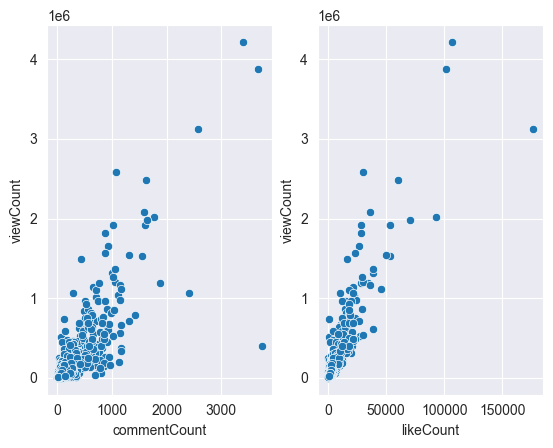

In [18]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = Download_df, x = "commentCount", y = "viewCount", ax=ax[0])
sns.scatterplot(data = Download_df, x = "likeCount", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

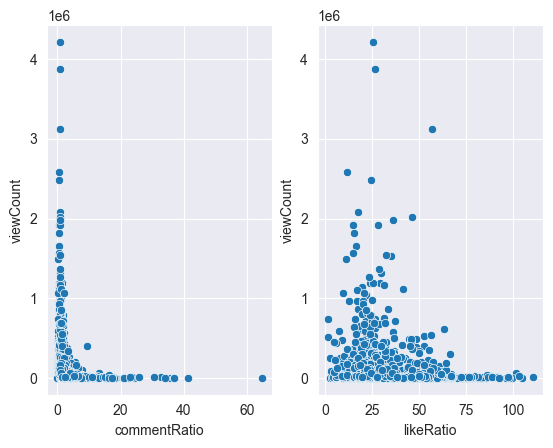

In [20]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = Download_df, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = Download_df, x = "likeRatio", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='likeRatio', ylabel='viewCount'>

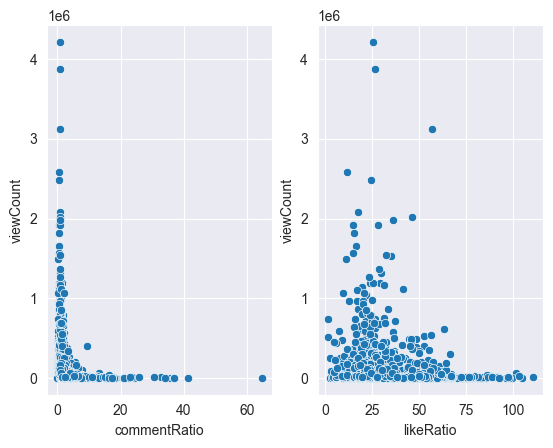

In [21]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = Download_df, x = "commentRatio", y = "viewCount", ax=ax[0])
sns.scatterplot(data = Download_df, x = "likeRatio", y = "viewCount", ax=ax[1])

<AxesSubplot:xlabel='durationSecs', ylabel='Count'>

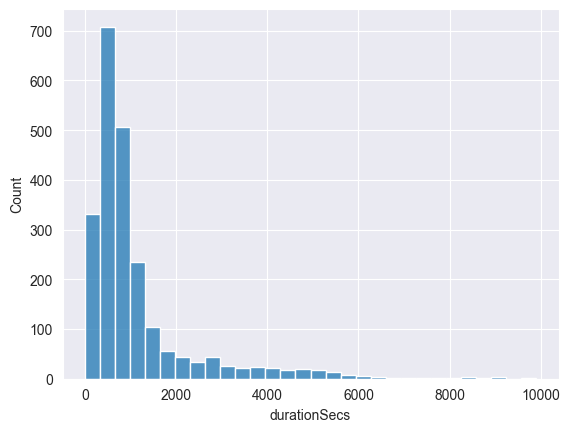

In [23]:
sns.histplot(data=Download_df[Download_df['durationSecs'] < 10000], x="durationSecs", bins=30)


<AxesSubplot:xlabel='durationSecs', ylabel='likeCount'>

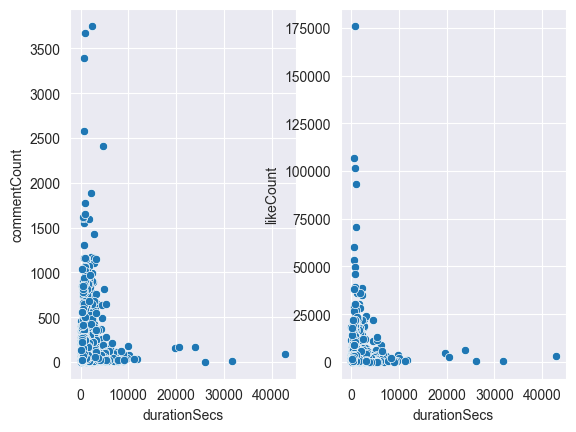

In [24]:
fig, ax =plt.subplots(1,2)
sns.scatterplot(data = Download_df, x = "durationSecs", y = "commentCount", ax=ax[0])
sns.scatterplot(data = Download_df, x = "durationSecs", y = "likeCount", ax=ax[1])

<AxesSubplot:xlabel='titleLength', ylabel='viewCount'>

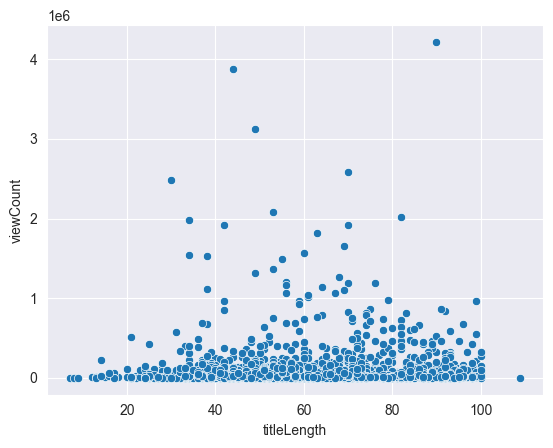

In [26]:
sns.scatterplot(data = Download_df, x = "titleLength", y = "viewCount")


In [28]:
stop_words = set(stopwords.words('english'))
Download_df['title_no_stopwords'] = Download_df['title'].apply(lambda x: [item for item in str(x).split() if item not in stop_words])

all_words = list([a for b in Download_df['title_no_stopwords'].tolist() for a in b])
all_words_str = ' '.join(all_words)

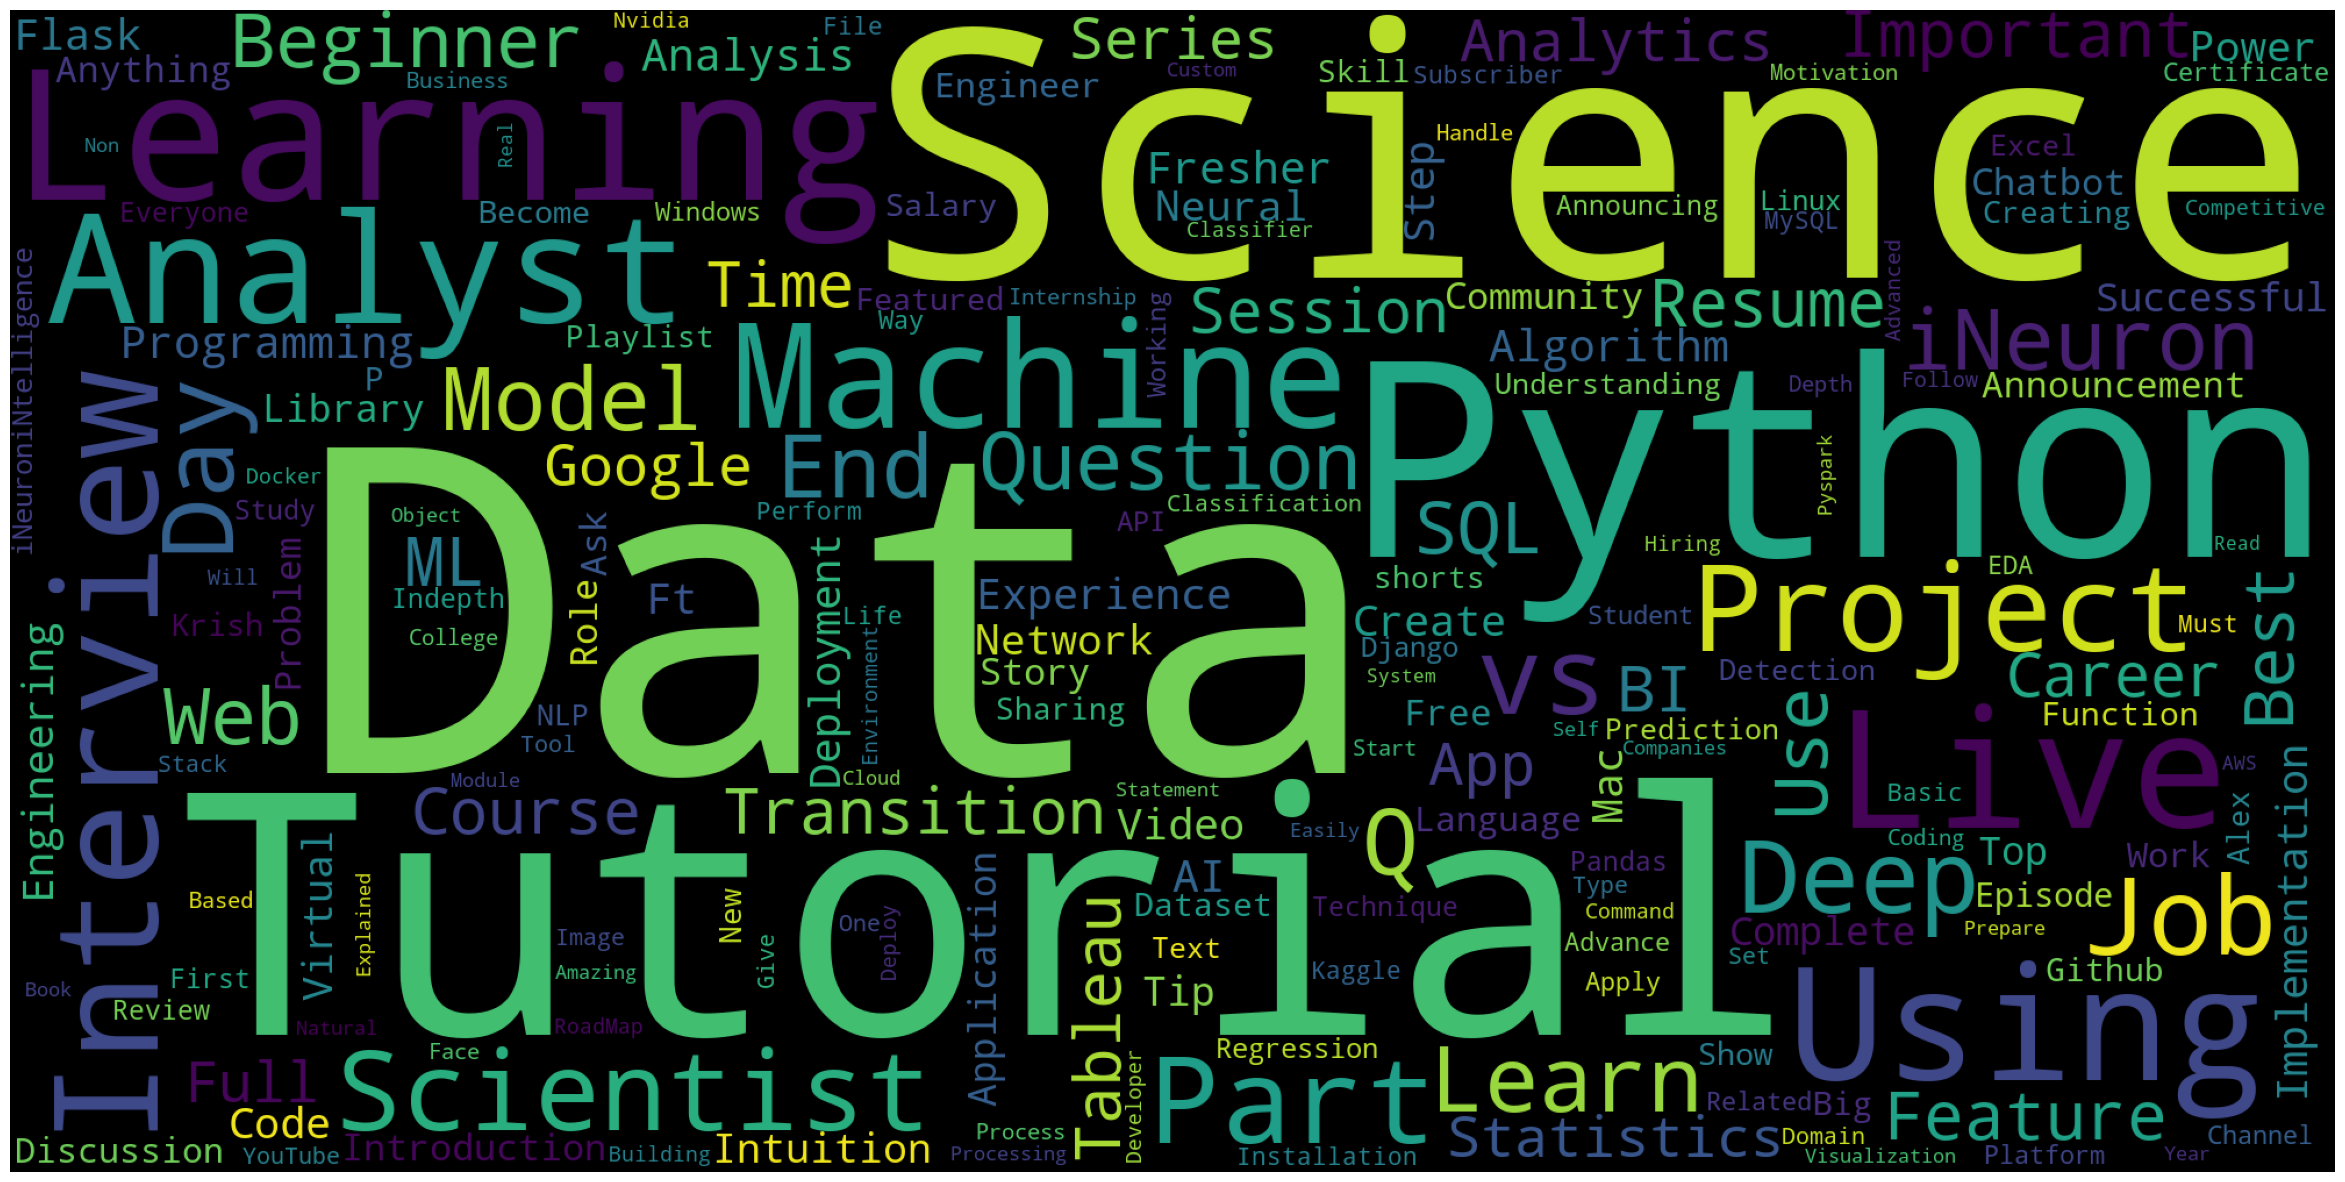

In [29]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(30, 20))
    plt.imshow(wordcloud)
    plt.axis("off");

wordcloud = WordCloud(width = 2000, height = 1000, random_state=1, background_color='black',
                      colormap='viridis', collocations=False).generate(all_words_str)
plot_cloud(wordcloud)

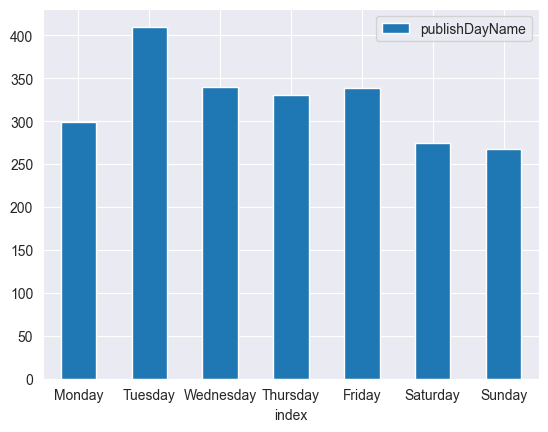

In [32]:
day_df = pd.DataFrame(Download_df['publishDayName'].value_counts())
weekdays = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_df = day_df.reindex(weekdays)
ax = day_df.reset_index().plot.bar(x='index', y='publishDayName', rot=0)

In [33]:
# Task 5:Check for outliers using a box plot or histogram.



'''
1. Here we plot the boxplot for analysing outliers for three features comment count, view count,like count vs channel titlw

a.Channel Title vs Comment Count: Here we see that Ali abdaals videos have high number of comments outliers. This is not observed for other channel titles. Here we can conclude that there is a possibility that there are spam comments present here or a single user is using multiple email ids for commenting. Also there could be a possinility that the perticular genre of video that ALi abdaal makes is viewed by a larger community or that he has a high number of Active Subscribers


b.Channel Tile vs View Count: Here we also observe that Ali Abdaal videos have a high number of views followed by Tina Huang. It can be concluded that the genre of videos that Ali Abdaal or Tina Huang makes are liked by everyone. There can be a possibility of spam and bots which are present as subscribers. The tags column for the channel title can provide insights on which genres are popular.

c. Channel Title vs Like count: HEre we observe that Ali Abdaal and Tina Huang channel have a higher number of likes and outliers. While there is a possibility of bots and spams present in the subscribers list of these two channels it can be possible that topics on which these videos are made are liked by everyone.



Apart from these factors other factors like the day on which the videos are posted and the time also play an important factor here.

'''


'\n1. Here we plot the boxplot for analysing outliers for three features comment count, view count,like count vs channel titlw\n\na.Channel Title vs Comment Count: Here we see that Ali abdaals videos have high number of comments outliers. This is not observed for other channel titles. Here we can conclude that there is a possibility that there are spam comments present here or a single user is using multiple email ids for commenting. Also there could be a possinility that the perticular genre of video that ALi abdaal makes is viewed by a larger community or that he has a high number of Active Subscribers\n\n\nb.Channel Tile vs View Count: Here we also observe that Ali Abdaal videos have a high number of views followed by Tina Huang. It can be concluded that the genre of videos that Ali Abdaal or Tina Huang makes are liked by everyone. There can be a possibility of spam and bots which are present as subscribers. The tags column for the channel title can provide insights on which genres 

<AxesSubplot:xlabel='channelTitle', ylabel='commentCount'>

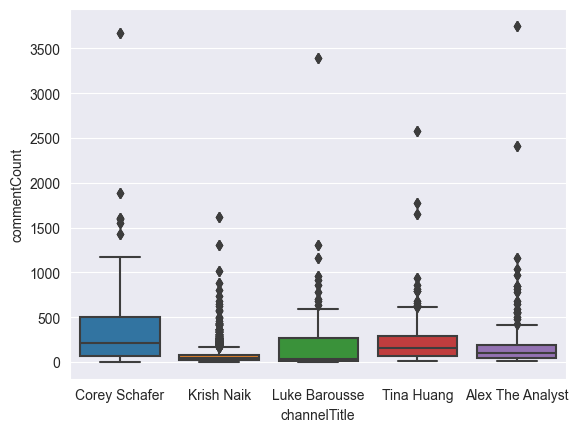

In [34]:
# Create a box plot using Seaborn to visualize the distribution of comment counts for each channel
sns.boxplot(data=Download_df, x="channelTitle", y="commentCount")